In [1]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Lepsita\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [64]:
import csv
import random
from faker import Faker
from datetime import datetime

In [65]:
# Initialize Faker
fake = Faker()  

In [66]:
# Define the schema fields
fields = [
    'order_id', 'customer_id', 'customer_name', 'product_id', 'product_name',
    'product_category', 'payment_type', 'qty', 'price', 'datetime', 'country',
    'city', 'ecommerce_website_name', 'payment_txn_id', 'payment_txn_success',
    'failure_reason'
]

In [67]:
# Define sample data
product_categories = ['Stationery', 'Electronics', 'Books', 'Clothing', 'Toys']
payment_types = ['Card', 'Internet Banking', 'UPI', 'Wallet']
countries = {
    'India': ['Mumbai', 'Delhi', 'Bengaluru', 'Chennai', 'Kolkata'],
    'USA': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Boston'],
    'UK': ['London', 'Manchester', 'Birmingham', 'Leeds', 'Oxford'],
    'Germany': ['Berlin', 'Munich', 'Frankfurt', 'Hamburg', 'Stuttgart']
}
websites = ['www.amazon.com', 'www.flipkart.com', 'www.ebay.in', 'www.tatacliq.com', 'www.snapdeal.com']
failures = ['Card Expired' , 'Blocked Card' , 'Transaction Timeout']


In [70]:
# Function to generate a single record
def generate_record(order_id):
    customer_id = random.randint(100, 999)
    customer_name = fake.name()
    product_id = random.randint(200, 299)
    product_name = fake.word().capitalize()
    product_category = random.choice(product_categories)
    payment_type = random.choice(payment_types)
    qty = random.randint(1, 10)
    price = round(random.uniform(5.0, 1000.0), 2)
    order_datetime = fake.date_time_between(start_date='-1y', end_date='now').strftime("%Y-%m-%d %H:%M")
    country = random.choice(list(countries.keys()))
    city = random.choice(countries[country])
    ecommerce_website_name = random.choice(websites)
    payment_txn_id = fake.uuid4().split('-')[0]
    payment_txn_success = random.choice(['Y', 'N'])
    failure_reason = "" if payment_txn_success == 'Y' else random.choice(failures)

    return [
        order_id, customer_id, customer_name, product_id, product_name,
        product_category, payment_type, qty, price, order_datetime, country,
        city, ecommerce_website_name, payment_txn_id, payment_txn_success,
        failure_reason
    ]

In [71]:
# Generate 10,000 records and write to CSV
with open('ecommerce_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(fields)  # Write the header
    for order_id in range(1, 10001):
        writer.writerow(generate_record(order_id))

print("Data generation complete. The file 'ecommerce_data.csv' has been created.") 

Data generation complete. The file 'ecommerce_data.csv' has been created.


ED Analysis

In [72]:
import pandas as pd

In [73]:
# Load the dataset
data = pd.read_csv('ecommerce_data.csv')
print(data)

      order_id  customer_id      customer_name  product_id product_name  \
0            1          416   Joseph Gillespie         247         Fast   
1            2          519     Matthew Travis         287           Tv   
2            3          803  Patrick Armstrong         226       Figure   
3            4          153        Faith Scott         224       Weight   
4            5          297         Steven Kim         218         They   
...        ...          ...                ...         ...          ...   
9995      9996          305     Rebecca Barnes         270         Move   
9996      9997          658     Suzanne Peters         265          How   
9997      9998          815     Jessica Wright         230    According   
9998      9999          301      Shawn Johnson         288          Her   
9999     10000          596   Anthony Anderson         232        While   

     product_category      payment_type  qty   price          datetime  \
0               Books    

In [74]:
# Display the first few rows
print(data.head())

   order_id  customer_id      customer_name  product_id product_name  \
0         1          416   Joseph Gillespie         247         Fast   
1         2          519     Matthew Travis         287           Tv   
2         3          803  Patrick Armstrong         226       Figure   
3         4          153        Faith Scott         224       Weight   
4         5          297         Steven Kim         218         They   

  product_category      payment_type  qty   price          datetime  country  \
0            Books              Card   10  151.96  2023-09-08 08:32      USA   
1            Books  Internet Banking    3   40.94  2023-09-28 02:04    India   
2             Toys            Wallet    2  473.67  2023-11-24 12:39    India   
3         Clothing  Internet Banking    9  254.93  2024-06-22 18:23  Germany   
4            Books            Wallet    7   89.18  2023-10-25 08:43    India   

        city ecommerce_website_name payment_txn_id payment_txn_success  \
0    Chicago

In [75]:
# Display the data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                10000 non-null  int64  
 1   customer_id             10000 non-null  int64  
 2   customer_name           10000 non-null  object 
 3   product_id              10000 non-null  int64  
 4   product_name            9992 non-null   object 
 5   product_category        10000 non-null  object 
 6   payment_type            10000 non-null  object 
 7   qty                     10000 non-null  int64  
 8   price                   10000 non-null  float64
 9   datetime                10000 non-null  object 
 10  country                 10000 non-null  object 
 11  city                    10000 non-null  object 
 12  ecommerce_website_name  10000 non-null  object 
 13  payment_txn_id          10000 non-null  object 
 14  payment_txn_success     10000 non-null 

In [76]:
# Summary statistics for numerical columns
print(data.describe())

          order_id   customer_id    product_id           qty         price
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000
mean    5000.50000    549.542900    249.411900      5.524000    502.964953
std     2886.89568    260.976528     29.095805      2.836376    288.410003
min        1.00000    100.000000    200.000000      1.000000      5.000000
25%     2500.75000    324.750000    224.000000      3.000000    253.167500
50%     5000.50000    547.000000    249.000000      6.000000    499.855000
75%     7500.25000    771.000000    275.000000      8.000000    757.575000
max    10000.00000    999.000000    299.000000     10.000000    999.810000


In [77]:
# checking the data types of each column
print(data.dtypes)

order_id                    int64
customer_id                 int64
customer_name              object
product_id                  int64
product_name               object
product_category           object
payment_type               object
qty                         int64
price                     float64
datetime                   object
country                    object
city                       object
ecommerce_website_name     object
payment_txn_id             object
payment_txn_success        object
failure_reason             object
dtype: object


In [78]:
# Check for missing values
print(data.isnull().sum())

order_id                     0
customer_id                  0
customer_name                0
product_id                   0
product_name                 8
product_category             0
payment_type                 0
qty                          0
price                        0
datetime                     0
country                      0
city                         0
ecommerce_website_name       0
payment_txn_id               0
payment_txn_success          0
failure_reason            5047
dtype: int64


In [79]:
#Filling the null values 
data = data.assign(product_name = data['product_name'].fillna('Unknown Product'))
print("Inserted the values for product nulls")

Inserted the values for product nulls


In [80]:
condition = (data['payment_txn_success'] == 'Y') & (data['failure_reason'].isnull())
data.loc[condition, 'failure_reason'] = 'Payment_successful'
print("Inserted the values for successful payment nulls")

Inserted the values for successful payment nulls


In [81]:
print(data.head())

   order_id  customer_id      customer_name  product_id product_name  \
0         1          416   Joseph Gillespie         247         Fast   
1         2          519     Matthew Travis         287           Tv   
2         3          803  Patrick Armstrong         226       Figure   
3         4          153        Faith Scott         224       Weight   
4         5          297         Steven Kim         218         They   

  product_category      payment_type  qty   price          datetime  country  \
0            Books              Card   10  151.96  2023-09-08 08:32      USA   
1            Books  Internet Banking    3   40.94  2023-09-28 02:04    India   
2             Toys            Wallet    2  473.67  2023-11-24 12:39    India   
3         Clothing  Internet Banking    9  254.93  2024-06-22 18:23  Germany   
4            Books            Wallet    7   89.18  2023-10-25 08:43    India   

        city ecommerce_website_name payment_txn_id payment_txn_success  \
0    Chicago

In [82]:
# Check for missing values
print(data.isnull().sum())

order_id                  0
customer_id               0
customer_name             0
product_id                0
product_name              0
product_category          0
payment_type              0
qty                       0
price                     0
datetime                  0
country                   0
city                      0
ecommerce_website_name    0
payment_txn_id            0
payment_txn_success       0
failure_reason            0
dtype: int64


In [83]:
# Check for duplicates
print(data.duplicated().sum())

0


In [84]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Lepsita\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


DATA VISUALIZATION

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

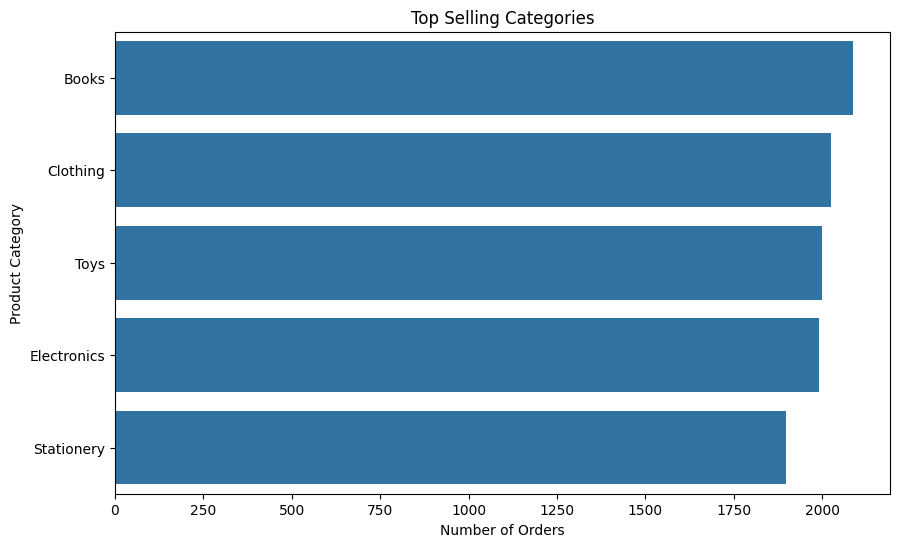

In [86]:
# Top Selling Categories
plt.figure(figsize=(10, 6))
sns.countplot(y='product_category', data=data, order=data['product_category'].value_counts().index)
plt.title('Top Selling Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show() 

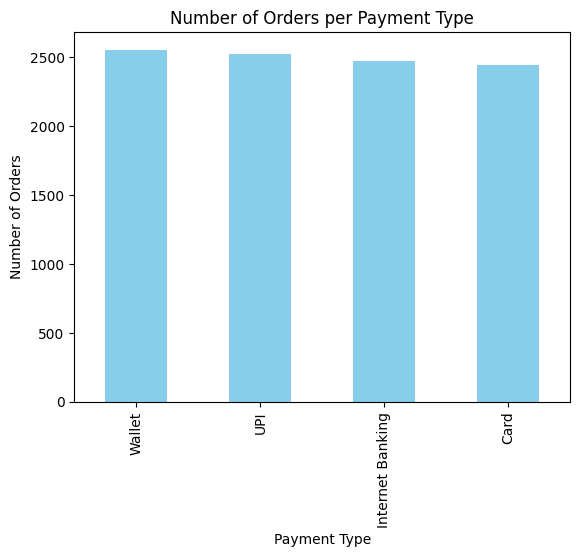

In [87]:
# Number of Orders per Payment Type
payment_type_counts = data['payment_type'].value_counts()
payment_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Orders per Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.show()

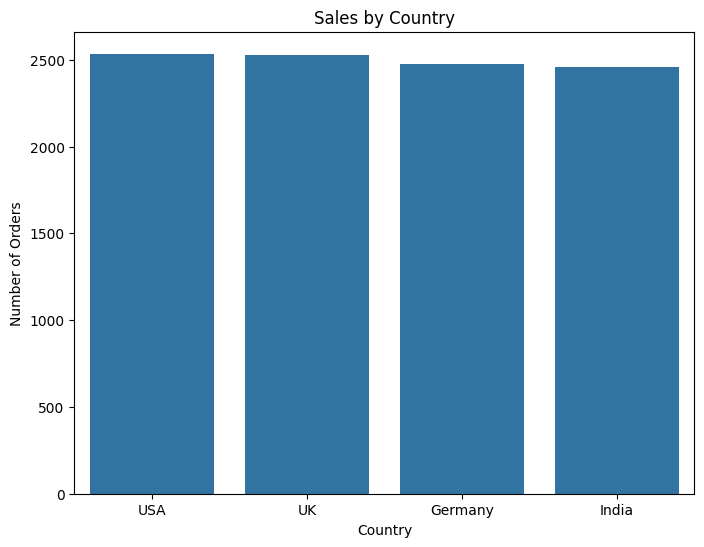

In [88]:
# Sales by Country
plt.figure(figsize=(8, 6))
sns.countplot(x='country', data=data, order=data['country'].value_counts().index)
plt.title('Sales by Country')
plt.ylabel('Number of Orders')
plt.xlabel('Country')
plt.show() 

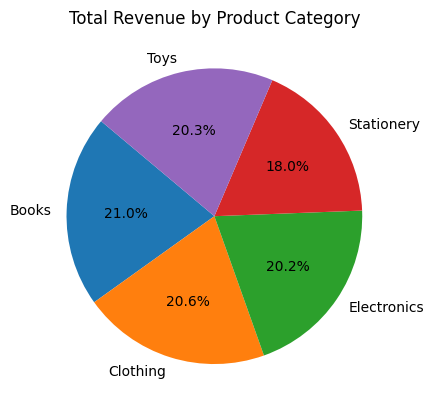

In [89]:
# Total Revenue by Product Category
data['revenue'] = data['qty'] * data['price']
category_revenue = data.groupby('product_category')['revenue'].sum()
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Product Category')
plt.ylabel('')
plt.show()

DATA ANALYSIS

In [90]:
# First, calculate the total revenue for each country and product category
data['revenue'] = data['qty'] * data['price']  # Ensure revenue is calculated
total_revenue = data.groupby(['country', 'product_category'])['revenue'].sum().unstack()

# Find the top-selling category per country based on revenue
top_categories = total_revenue.idxmax(axis=1)

# Get the total revenue of the top-selling category per country
top_revenue = total_revenue.max(axis=1)

# Format revenue as currency (with $ symbol)
top_revenue_formatted = top_revenue.apply(lambda x: f"${x:,.2f}")

# Combine the top-selling category with its total revenue
top_categories_revenue = pd.DataFrame({
    'Top Selling Category': top_categories,
    'Total Revenue': top_revenue_formatted
})

# Sort by total revenue in descending order
top_categories_revenue_sorted = top_categories_revenue.sort_values(by='Total Revenue', ascending=False, key=lambda x: top_revenue)

print("Top Selling Category Per Country with Total Revenue (Sorted by Revenue):")
print(top_categories_revenue_sorted)


Top Selling Category Per Country with Total Revenue (Sorted by Revenue):
        Top Selling Category  Total Revenue
country                                    
India               Clothing  $1,523,782.65
USA                    Books  $1,520,208.75
UK                      Toys  $1,500,227.63
Germany                Books  $1,488,279.54


In [91]:
# Product Popularity Change Throughout the Year Per Country
data['month'] = pd.to_datetime(data['datetime']).dt.month

# Group by 'country', 'month', and 'product_category' and sum the 'qty' (quantity)
popularity_trends = data.groupby(['country', 'month', 'product_category'])['qty'].sum().unstack()

# Print the result
print("Product Popularity Change Throughout the Year Per Country (by Quantity):")
print(popularity_trends)


Product Popularity Change Throughout the Year Per Country (by Quantity):
product_category  Books  Clothing  Electronics  Stationery  Toys
country month                                                   
Germany 1           274       190          212         219   200
        2           240       206          248         241   191
        3           198       201          256         210   243
        4           264       235          223         154   296
        5           241       239          236         246   214
        6           250       250          170         243   206
        7           327       208          209         203   229
        8           338       265          262         212   204
        9           239       218          184         262   220
        10          229       222          204         238   212
        11          195       198          207         210   257
        12          307       239          269         132   191
India   1        

In [92]:
# Locations with the Highest Traffic of Sales
high_traffic_cities = data['city'].value_counts().head(10)
print("Locations with Highest Traffic of Sales:")
print(high_traffic_cities)

Locations with Highest Traffic of Sales:
city
Oxford         530
Boston         530
Chicago        527
London         520
Chennai        513
Los Angeles    509
Munich         504
Stuttgart      500
Hamburg        500
Manchester     499
Name: count, dtype: int64


In [93]:
# Times with the Highest Traffic of Sales Per Country

# Set display options to avoid truncation
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Ensure wide DataFrames are not wrapped
pd.set_option('display.max_colwidth', None)  # Display entire content of each column

data['hour'] = pd.to_datetime(data['datetime']).dt.hour
traffic_by_time = data.groupby(['country', 'hour']).size().unstack()
print("Times with Highest Traffic of Sales Per Country:")
print(traffic_by_time)

Times with Highest Traffic of Sales Per Country:
hour      0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
country                                                                         
Germany   91  115   79  111   97   81  103  102  100  103  120  102   99  114   
India     95   95  100  109   90  117  106   93  104  110   92   99  113  105   
UK       100   91   97   96   97  110   93  106  128  106  102  109  130  103   
USA      100   91  114  104  114   93  102  112  107  102  109  105  120  107   

hour      14   15   16   17   18   19   20   21   22   23  
country                                                    
Germany  111   98  103  116  129  114   84   99  119   86  
India    115  110   88   94  100  108  114  105   96  103  
UK       106  118   98  108  107  114  107  106   99   97  
USA      121   90   83  113  105  126  104   95  119   99  


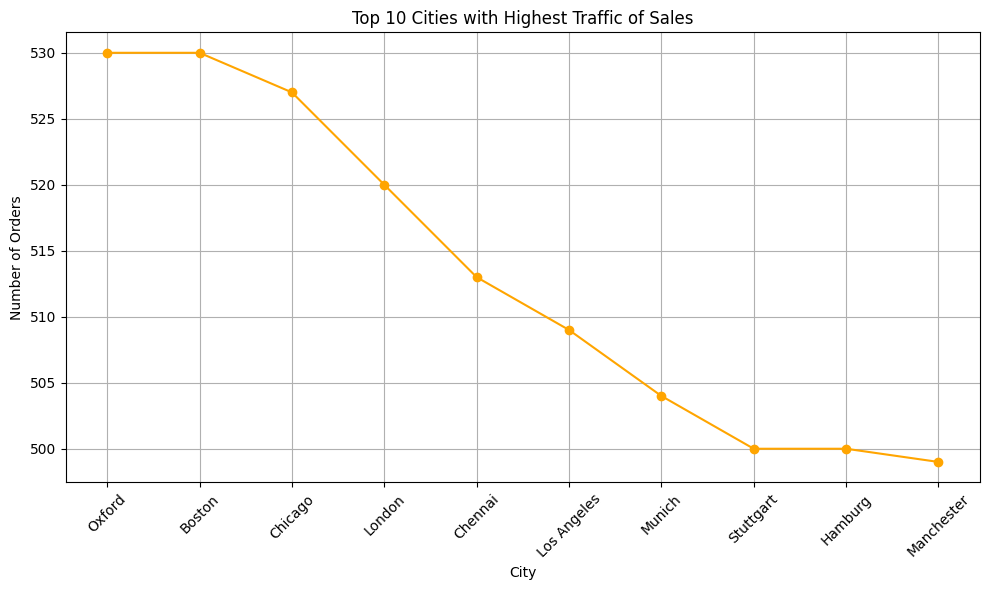

In [94]:
# Assuming `data` has a 'city' column and you want to visualize the top 10 cities by traffic (number of orders)
high_traffic_cities = data['city'].value_counts().head(10)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(high_traffic_cities.index, high_traffic_cities.values, marker='o', color='orange')
plt.title('Top 10 Cities with Highest Traffic of Sales')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate city names for readability
plt.grid(True)  # Optional: add grid for clarity
plt.tight_layout()  # Adjust layout for better fit
plt.show()